In [2]:
#Importing Necessary Libraries
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.src.legacy.preprocessing.image import ImageDataGenerator
import cv2
import datetime


# Model CNN Building(Mask and No mask)
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Rescaling 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')
#model_fitting
model_saved=model.fit(
        training_set,
        epochs=10,
        validation_data=test_set
        )

model.save('face_mask_model.h5',model_saved)

/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Epoch 1/10


/Users/bheema.ujwala/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.6599 - loss: 0.5816 - val_accuracy: 0.9124 - val_loss: 0.2825
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.9486 - loss: 0.1626 - val_accuracy: 0.9588 - val_loss: 0.1993
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 237ms/step - accuracy: 0.9477 - loss: 0.1275 - val_accuracy: 0.9536 - val_loss: 0.1929
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 30s 353ms/step - accuracy: 0.9589 - loss: 0.1385 - val_accuracy: 0.9742 - val_loss: 0.0864
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 26s 291ms/step - accuracy: 0.9718 - loss: 0.0711 - val_accuracy: 0.9794 - val_loss: 0.0598
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 32s 368ms/step - accuracy: 0.9757 - loss: 0.0681 - val_accuracy: 0.9742 - val_loss: 0.0594
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 32s 367ms/step - accuracy: 0.9775 - loss: 0.0658 - val_accuracy: 0.9639 - val_loss: 0.0961
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 34s 380ms/step - accuracy: 0.9843 - loss: 0.0470 - val_accuracy: 0.969

In [4]:
face_mask_model=load_model('face_mask_model.h5')

test_accuracy = face_mask_model.evaluate(test_set)[1] 
train_accuracy = face_mask_model.evaluate(training_set)[1] 

print("Test Accuracy: ", test_accuracy)
print("Train Accuracy: ", train_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9558 - loss: 0.1373
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - accuracy: 0.9812 - loss: 0.0496
Test Accuracy:  0.969072163105011
Train Accuracy:  0.9863013625144958


In [43]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator

# Initialize the model
model_ann = Sequential()

# Add input layer (Flatten layer)
model_ann.add(Flatten(input_shape=(150, 150, 3)))

# Add first hidden layer
model_ann.add(Dense(units=128, activation='relu'))

# Add output layer
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

# Train the model
history = model_ann.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=5,
    validation_data=test_set,
    validation_steps=len(test_set)
)

model.save('face_mask_model_ann.h5',history)
# Get training and testing accuracy
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Epoch 1/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.5697 - loss: 12.2304 - val_accuracy: 0.7320 - val_loss: 3.7271
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/5


2024-04-22 15:26:22.376991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 15:26:22.390316: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.8119 - loss: 1.5826 - val_accuracy: 0.7268 - val_loss: 2.2383
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/5


2024-04-22 15:26:37.904086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 15:26:37.917746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.8440 - loss: 0.8139 - val_accuracy: 0.8763 - val_loss: 0.7814


In [44]:
print("Training Accuracy:", train_accuracy[-1])
print("Testing Accuracy:", test_accuracy[-1])

Training Accuracy: 0.8622526526451111
Testing Accuracy: 0.876288652420044


In [54]:
training_set

In [63]:
from tensorflow.keras.applications.vgg16 import preprocess_input

# Reshape the data using the ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Apply VGG16 preprocessing
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Apply VGG16 preprocessing
)

training_set = train_datagen.flow_from_directory(
    'train',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'test',
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary'
)

# Create and compile your VGG16-based model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_base.layers:
    layer.trainable = False

x = Flatten()(vgg_base.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=vgg_base.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(training_set, epochs=10, validation_data=test_set)

test_loss, test_accuracy = model.evaluate(test_set)
print("Test Accuracy:", test_accuracy)

train_loss, train_accuracy = model.evaluate(training_set)
print("Train Accuracy:", train_accuracy)

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.9108 - loss: 2.1147 - val_accuracy: 0.9845 - val_loss: 0.2673
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.9950 - loss: 0.0960 - val_accuracy: 0.9742 - val_loss: 2.0259
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.9921 - loss: 0.2427 - val_accuracy: 0.9897 - val_loss: 3.3394
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.9922 - loss: 0.5680 - val_accuracy: 0.9794 - val_loss: 3.7846
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.9901 - loss: 0.5042 - val_accuracy: 0.9691 - val_loss: 3.2153
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.9934 - loss: 0.1841 - val_accuracy: 0.9794 - val_loss: 2.3010
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.9957 - loss: 0.8976 - val_accuracy: 0.9742 - val_loss: 2.1565
Epoch 8/10
83/83 ━━━━━━━━━━━

In [ ]:
# # Train the model
# model_vgg16_history = model_vgg16.fit(
#     training_set,
#     steps_per_epoch=len(training_set),
#     epochs=5,
#     validation_data=test_set,
#     validation_steps=len(test_set)
# )

# model.save('face_mask_model_ann.h5',model_vgg16_history)
# # Get training and testing accuracy
# train_accuracy = model_vgg16_history.history['accuracy']
# test_accuracy = model_vgg16_history.history['val_accuracy']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


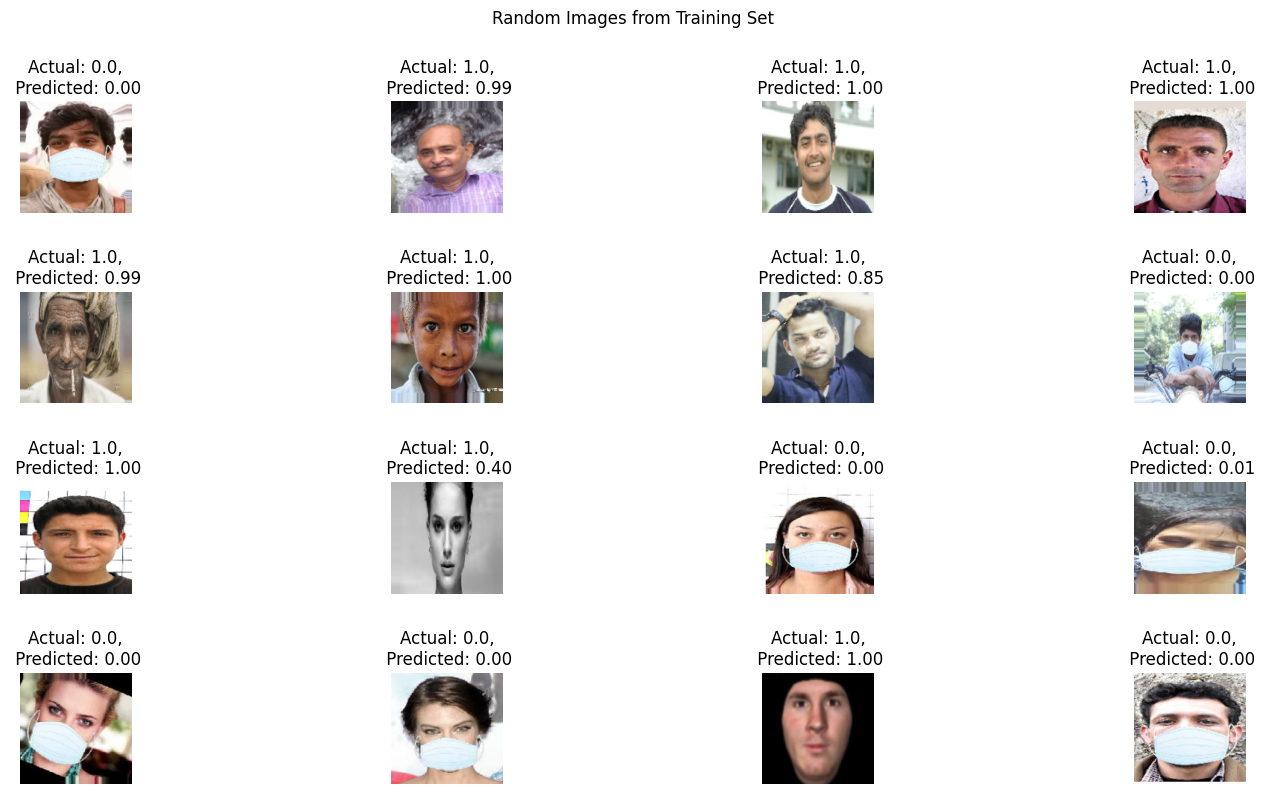

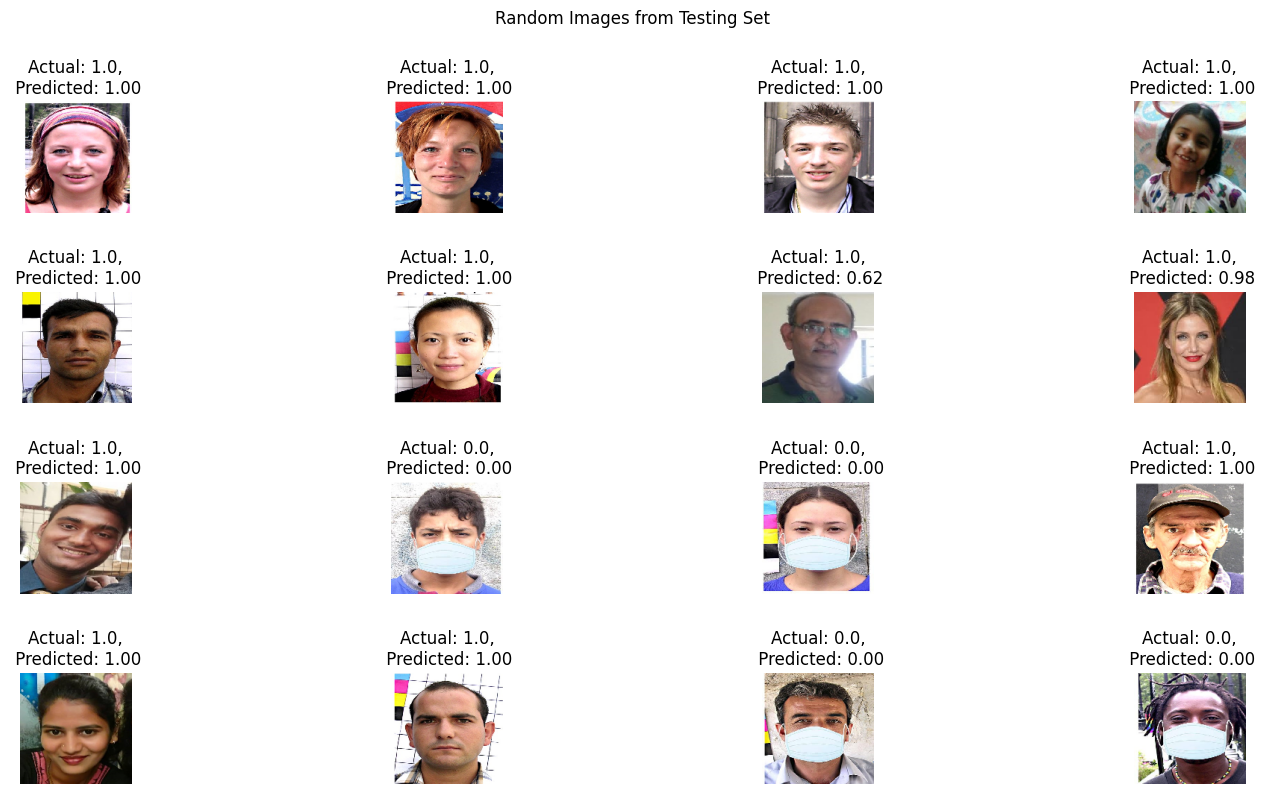

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

train_batch = next(training_set)
train_images, train_labels = train_batch[0], train_batch[1]

test_batch = next(test_set)
test_images, test_labels = test_batch[0], test_batch[1]

train_predictions = face_mask_model.predict(train_images)
test_predictions = model.predict(test_images)

# Function to plot images with their predicted and actual labels
def plot_images(images, labels, predictions, title):
    plt.figure(figsize=(15, 10))
    for i in range(min(20, len(images))):
        plt.subplot(5, 4, i+1)
        plt.imshow(images[i])
        plt.title(f"\nActual: {labels[i]},\n Predicted: {predictions[i][0]:.2f}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot random images from training set
plot_images(train_images, train_labels, train_predictions, title="Random Images from Training Set")

# Plot random images from testing set
plot_images(test_images, test_labels, test_predictions, title='Random Images from Testing Set')

In [9]:
#To test for individual images
test_image=image.load_img('new.JPG',
                          target_size=(150,150,3))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
face_mask_model.predict(test_image)[0][0]

images (3).jpeg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


0.0

In [19]:
test_image1=image.load_img('images (5).jpeg',
                          target_size=(150,150,3))
test_image1=image.img_to_array(test_image1)
test_image1=np.expand_dims(test_image1,axis=0)
face_mask_model.predict(test_image1)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


2.852703e-12

In [20]:
test_image2=image.load_img('portrait-of-african-american-dark-skin-woman-fashion-model-wearing-quarantine-medical-fishnet-permeable-face-mask-coarse-mesh-net-covid-19-coronavirus-protection-unsafe-dangerous-concept-2G3C0AM.jpg',
                          target_size=(150,150,3))
test_image2=image.img_to_array(test_image2)
test_image2=np.expand_dims(test_image2,axis=0)
face_mask_model.predict(test_image2)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


0.0

In [64]:
test_image3=image.load_img('beard.jpeg',
                          target_size=(150,150,3))
test_image3=image.img_to_array(test_image3)
test_image3=np.expand_dims(test_image3,axis=0)
face_mask_model.predict(test_image3)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


0.0

In [ ]:
test_image=image.load_img('images (3).jpeg',
                          target_size=(150,150,3))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
face_mask_model.predict(test_image)[0][0]

In [6]:
# Live Mask Detection
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=face_mask_model.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications

# Define VGG-like CNN for feature extraction
def create_vgg_model(input_shape):
    vgg_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    vgg_model.trainable = False  # Freeze the weights of the VGG model
    output = layers.Flatten()(vgg_model.output)  # Flatten the output of VGG
    return models.Model(inputs=vgg_model.input, outputs=output)

# Define RNN model
def create_rnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Combine VGG and RNN
def create_vgg_rnn_model(input_shape, num_classes):
    vgg_model = create_vgg_model(input_shape)
    rnn_model = create_rnn_model((None, input_shape[1]), num_classes)
    
    model = models.Sequential()
    model.add(vgg_model)
    model.add(layers.Reshape((-1, vgg_model.output_shape[1])))  # Reshape for RNN
    model.add(rnn_model)
    return model

# Define input shape and number of classes
input_shape = (224,224, 3) 
num_classes = 2  # Mask or No Mask

# Create the VGG + RNN model
vgg_rnn_model = create_vgg_rnn_model(input_shape, num_classes)

# Compile the model
vgg_rnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
vgg_rnn_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_49 (Functional)      │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_12 (Sequential)      │ ?                      │       192,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,907,074 (56.87 MB)

 Trainable params: 192,386 (751.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [51]:
model_saved=vgg_rnn_model.fit(
        training_set,
        epochs=10,
        validation_data=test_set
        )

model.save('face_mask_vgg_rnn_model.h5',model_saved)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_52" is incompatible with the layer: expected shape=(None, None, 150), found shape=(None, 1, 8192)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 1, 8192), dtype=float32, sparse=False, name=keras_tensor_1281>',)
  • kwargs={'mask': 'None'}

In [39]:
from keras.applications import VGG16, ResNet50, InceptionV3, MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator

# base_model_vgg16 = VGG16(weights=None, include_top=False, input_shape=(150, 150, 3))
# base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# Load the weights from the downloaded file

base_model_vgg16 = VGG16(weights=None, input_shape=(150, 150, 3), include_top=False)
weights_path = '/Users/bheema.ujwala/Downloads/RCertified_AIML/FaceMaskDetector/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
base_model_vgg16.load_weights(weights_path)


base_model_vgg16.load_weights(weights_path)

# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Function to create and compile model
def create_model(base_model):
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load pre-trained models without top layers

base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Create and compile models
# model_vgg16 = create_model(base_model_vgg16)
# model_resnet50 = create_model(base_model_resnet50)
# model_inceptionv3 = create_model(base_model_inceptionv3)
# model_mobilenet = create_model(base_model_mobilenet)

# Train and evaluate models
def train_and_evaluate(model, train_generator, test_generator):
    model.fit(train_generator, epochs=10, validation_data=test_generator)
    _, train_accuracy = model.evaluate(train_generator)
    _, test_accuracy = model.evaluate(test_generator)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

print("VGG16 Model:")
train_and_evaluate(model_vgg16, train_generator, test_generator)

# print("ResNet50 Model:")
# train_and_evaluate(model_resnet50, train_generator, test_generator)

# print("InceptionV3 Model:")
# train_and_evaluate(model_inceptionv3, train_generator, test_generator)

# print("MobileNet Model:")
# train_and_evaluate(model_mobilenet, train_generator, test_generator)

ValueError: Layer count mismatch when loading weights from file. Model expected 13 layers, found 16 saved layers.

In [61]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam


import ssl

ssl._create_default_https_context = ssl._create_unverified_context

model = InceptionV3(weights='imagenet', include_top=False)
# Load the pre-trained VGG16 model with ImageNet weights
weights_path = '/Users/bheema.ujwala/Downloads/RCertified_AIML/FaceMaskDetector/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# model = InceptionV3(weights='imagenet', include_top=False)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(224,224),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(224,224),
        batch_size=16,
        class_mode='binary')

base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg16.load_weights(weights_path)
# Add custom fully connected layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the full model
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_vgg16.summary()

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


ValueError: Layer count mismatch when loading weights from file. Model expected 13 layers, found 16 saved layers.